### Імпорт модулів

In [1]:
import numpy
import scipy.misc
import matplotlib.pyplot
from neural_network import NeuralNetwork

### Параметри нейронної мережі

In [2]:
input_nodes_number = 784
# залежність ефективності нейронної мережі від кількості прихованих вузлів нелінійна.
# 200 вузлів дозволяють досягти компроміс
# між ефективністью нейронною мережі та затратами часу на її тренування.
hidden_nodes_number = 200
output_nodes_number = 10
# коефіцієнт навчання впливає на монотонність процесу мінімізації похибки та
# швидкість (розмір кроку) методу градієнтного спуску.
# враховуючи, що процес тренування нейронної мережі містить елементи випадковості,
# шляхом підбору коефіцієнтів було встановлено,
# що оптимальний коефіцієнт може бути в діапазоні від 0,1 до 0,3
training_factor = 0.1
# епоха - кількість разів використання тренувальної вибірки даних
# для тренування нейронної мережі.
# Кількість тренувальних епох впливає на розмір коефіцієнту тренування,
# оскільки при більшій кількості епох, можна використати менший крок градієнтного спуску.
epochs = 5

 ### Ініціалізація моделі

In [3]:
neural_network = NeuralNetwork(input_nodes_number,
                  hidden_nodes_number,
                  output_nodes_number,
                  training_factor)

### Підготовка тренувальних даних

In [4]:
training_data_file = open("dataset/MNIST/mnist_train_60000_full.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

### Демонстрація зображення з набору MNIST

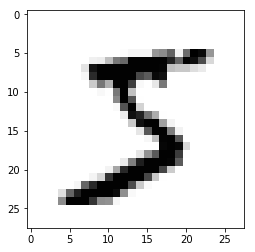

In [5]:
image_array = numpy.asfarray(training_data_list[0].split(',')[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
matplotlib.pyplot.show()

### Тренування моделі

In [6]:
for e in range(epochs):
    for line in training_data_list:
        all_values = line.split(',')
        input_signals = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        correct_output_signals = numpy.zeros(output_nodes_number) + 0.01
        correct_output_signals[int(all_values[0])] = 0.99
        neural_network.train(input_signals, correct_output_signals)
        pass
    pass

### Підготовка тестувальних даних

In [7]:
test_data_file = open("dataset/MNIST/mnist_test_10000_full.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

### Тестування моделі

In [13]:
scores = []
for record in test_data_list:
    all_values = record.split(',')
    correct_digit = int(all_values[0])
    # print(correct_digit, "справжнє значення")
    input_signals = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    output_signals = neural_network.query(input_signals)
    output_digit = numpy.argmax(output_signals)
    # print(output_digit, "відповідь нейронної мережі")
    if output_digit == correct_digit:
        scores.append(1)
    else:
        scores.append(0)
        pass
    
    pass

# print(scores)
scores_array = numpy.asarray(scores)
print("Eфективність = ", scores_array.sum() / scores_array.size)

Eфективність =  0.9749


### Розпізнати саморобне зображення не з набору

In [15]:
img_array = scipy.misc.imread("dataset/my_images/5.png", flatten=True)
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

output_signals = neural_network.query(img_data)
output_digit = numpy.argmax(output_signals)
print(output_digit, "відповідь нейронної мережі")

5 відповідь нейронної мережі


/home/eugene/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


### Демонстрація зображення

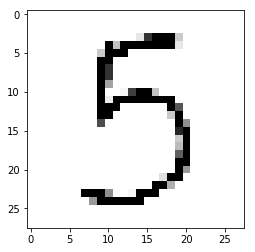

In [16]:
image_array = numpy.asfarray(img_data).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
matplotlib.pyplot.show()